# **Importing all the required packages into the web Integrated Development Environment(IDE):**

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')


project_directory = '/content/drive/MyDrive/Colab_Notebooks/Project103/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importing all the required packages for the analysis:**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import matplotlib.dates as mdates

# **Loading the dowloaded datasets to the web IDE:**

# **Prevalance Datasets for Acute Myocardial Infarction(AMI), Heart Failure(HF),Hypertension(HT),Ischemic Heart Disease(IHD),Stroke(S):**

In [ ]:
pdf_AMI = pd.read_csv(project_directory+'AMI_CP.csv')
pdf_HF = pd.read_csv(project_directory+'HF_CP.csv')
pdf_HT = pd.read_csv(project_directory+'HT_CP.csv')
pdf_IHD = pd.read_csv(project_directory+'IHD_Crude_Prevalence.csv')
pdf_S = pd.read_csv(project_directory+'Stroke_Crude_Prevalence.csv')

# **Incidence Datasets for Acute Myocardial Infarction(AMI), Heart Failure(HF),Hypertension(HT),Ischemic Heart Disease(IHD),Stroke(S):**

In [ ]:
idf_AMI = pd.read_csv(project_directory+'AMI.csv', encoding='unicode_escape')
idf_HF = pd.read_csv(project_directory+'HF.csv', encoding='unicode_escape')
idf_HT = pd.read_csv(project_directory+'HT.csv', encoding='unicode_escape')
idf_IHD = pd.read_csv(project_directory+'IHD.csv', encoding='unicode_escape')
idf_S = pd.read_csv(project_directory+'stroke.csv', encoding='unicode_escape')


# **Mortality Datasets for Acute Myocardial Infarction(AMI), Heart Failure(HF),Hypertension(HT),Ischemic Heart Disease(IHD),Stroke(S):**

In [ ]:
mdf_AMI = pd.read_csv(project_directory+'AMI_Mortality.csv', encoding='unicode_escape')
mdf_HF = pd.read_csv(project_directory+'HF_Mortality.csv', encoding='unicode_escape')
mdf_HT = pd.read_csv(project_directory+'HT_Mortality.csv', encoding='unicode_escape')
mdf_IHD = pd.read_csv(project_directory+'IHD_Mortality.csv', encoding='unicode_escape')
mdf_S = pd.read_csv(project_directory+'St_Mortality.csv', encoding='unicode_escape')

# **Exploratory Data Analysis(EDA):**

We are doing EDA so we can decide what preprocessing and cleaning is necessary so the end analysis won't be skewed largely.

# **Checking for null values in datasets:**


## Acute Myocardial Infarction Prevalance(pdf_AMI), Acute Myocardial Infarction Incidence(idf_AMI), Acute Myocardial Infarction Mortality(mdf_AMI):

In [ ]:
pdf_AMI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5601 entries, 0 to 5600
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               5583 non-null   object 
 1   Sex                5580 non-null   object 
 2   Age Group          5580 non-null   object 
 3   Year               5580 non-null   float64
 4   Rate (%)           4886 non-null   float64
 5   Rate_95%_CI_Lower  4886 non-null   float64
 6   Rate_95%_CI_Upper  4886 non-null   float64
 7   Rate CV            4886 non-null   float64
 8   Counts             4886 non-null   float64
 9   Population         4886 non-null   float64
dtypes: float64(7), object(3)
memory usage: 437.7+ KB


In [ ]:
idf_AMI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5580 entries, 0 to 5579
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area                5580 non-null   object 
 1   Sex                 5580 non-null   object 
 2   Age Group           5580 non-null   object 
 3   Year                5580 non-null   int64  
 4   Rate (per 100,000)  4516 non-null   float64
 5   Rate_95%_CI_Lower   4516 non-null   float64
 6   Rate_95%_CI_Upper   4516 non-null   float64
 7   Rate CV             4516 non-null   float64
 8   Counts              4516 non-null   float64
 9   Population          4516 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 436.1+ KB


In [ ]:
mdf_AMI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 17 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Area                                             780 non-null    object 
 1   Sex                                              780 non-null    object 
 2   Age Group                                        780 non-null    object 
 3   Year                                             780 non-null    int64  
 4   Mortality without the condition (per 100,000)    702 non-null    float64
 5   Lower_95%_CI of Mortality without the condition  702 non-null    float64
 6   Upper_95%_CI of Mortality without the condition  702 non-null    float64
 7   Number of Mortality without the condition        702 non-null    float64
 8   Population of Mortality without the condition    702 non-null    float64
 9   Mortality with the condition (pe

In [ ]:
pdf_AMI.isnull().sum()

Area                  18
Sex                   21
Age Group             21
Year                  21
Rate (%)             715
Rate_95%_CI_Lower    715
Rate_95%_CI_Upper    715
Rate CV              715
Counts               715
Population           715
dtype: int64

In [ ]:
idf_AMI.isnull().sum()

Area                     0
Sex                      0
Age Group                0
Year                     0
Rate (per 100,000)    1064
Rate_95%_CI_Lower     1064
Rate_95%_CI_Upper     1064
Rate CV               1064
Counts                1064
Population            1064
dtype: int64

In [ ]:
mdf_AMI.isnull().sum()

Area                                                 0
Sex                                                  0
Age Group                                            0
Year                                                 0
Mortality without the condition (per 100,000)       78
Lower_95%_CI of Mortality without the condition     78
Upper_95%_CI of Mortality without the condition     78
Number of Mortality without the condition           78
Population of Mortality without the condition       78
Mortality with the condition (per 100,000)         170
Lower_95%_CI of Mortality with the condition       170
Upper_95%_CI of Mortality with the condition       170
Number of Mortality with the condition             170
Population of Mortality with the condition         170
Rate Ratio                                         170
Lower_95%_CI of Rate Ratio                         170
Upper_95%_CI of Rate Ratio                         170
dtype: int64

### *From the above we can see that all 3 datasets for Acute Myocardial Infarction have null values which will skew the temporal trends so we will drop those values from that dataset as part of the preprocessing and cleaning the data to get it ready for the analysis.*




In [ ]:
pdf_AMI = pd.read_csv(project_directory+'AMI_CP.csv').dropna()
idf_AMI = pd.read_csv(project_directory+'AMI.csv', encoding='unicode_escape').dropna()
mdf_AMI = pd.read_csv(project_directory+'AMI_Mortality.csv', encoding='unicode_escape').dropna()

# checking to verify the sum of null values is now zero for all columns

pdf_AMI.isnull().sum()
idf_AMI.isnull().sum()
mdf_AMI.isnull().sum()


Area                                               0
Sex                                                0
Age Group                                          0
Year                                               0
Mortality without the condition (per 100,000)      0
Lower_95%_CI of Mortality without the condition    0
Upper_95%_CI of Mortality without the condition    0
Number of Mortality without the condition          0
Population of Mortality without the condition      0
Mortality with the condition (per 100,000)         0
Lower_95%_CI of Mortality with the condition       0
Upper_95%_CI of Mortality with the condition       0
Number of Mortality with the condition             0
Population of Mortality with the condition         0
Rate Ratio                                         0
Lower_95%_CI of Rate Ratio                         0
Upper_95%_CI of Rate Ratio                         0
dtype: int64

## Heart Failure Prevalance(pdf_HF), Heart Failure Incidence(idf_HF), Heart Failure Mortality(mdf_HF):



In [ ]:
pdf_HF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4560 entries, 0 to 4559
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               4560 non-null   object 
 1   Sex                4560 non-null   object 
 2   Age Group          4560 non-null   object 
 3   Year               4560 non-null   int64  
 4   Rate (%)           4190 non-null   float64
 5   Rate_95%_CI_Lower  4190 non-null   float64
 6   Rate_95%_CI_Upper  4190 non-null   float64
 7   Rate CV            4190 non-null   float64
 8   Counts             4190 non-null   float64
 9   Population         4190 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 356.4+ KB


In [ ]:
pdf_HF.isnull().sum()

Area                   0
Sex                    0
Age Group              0
Year                   0
Rate (%)             370
Rate_95%_CI_Lower    370
Rate_95%_CI_Upper    370
Rate CV              370
Counts               370
Population           370
dtype: int64

In [ ]:
idf_HF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4560 entries, 0 to 4559
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area                4560 non-null   object 
 1   Sex                 4560 non-null   object 
 2   Age Group           4560 non-null   object 
 3   Year                4560 non-null   int64  
 4   Rate (per 100,000)  4007 non-null   float64
 5   Rate_95%_CI_Lower   4007 non-null   float64
 6   Rate_95%_CI_Upper   4007 non-null   float64
 7   Rate CV             4007 non-null   float64
 8   Counts              4007 non-null   float64
 9   Population          4007 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 356.4+ KB


In [ ]:
idf_HF.isnull().sum()

Area                    0
Sex                     0
Age Group               0
Year                    0
Rate (per 100,000)    553
Rate_95%_CI_Lower     553
Rate_95%_CI_Upper     553
Rate CV               553
Counts                553
Population            553
dtype: int64

In [ ]:
mdf_HF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 17 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Area                                             780 non-null    object 
 1   Sex                                              780 non-null    object 
 2   Age Group                                        780 non-null    object 
 3   Year                                             780 non-null    int64  
 4   Mortality without the condition (per 100,000)    701 non-null    float64
 5   Lower_95%_CI of Mortality without the condition  701 non-null    float64
 6   Upper_95%_CI of Mortality without the condition  701 non-null    float64
 7   Number of Mortality without the condition        701 non-null    float64
 8   Population of Mortality without the condition    701 non-null    float64
 9   Mortality with the condition (pe

In [ ]:
mdf_HF.isnull().sum()

Area                                                 0
Sex                                                  0
Age Group                                            0
Year                                                 0
Mortality without the condition (per 100,000)       79
Lower_95%_CI of Mortality without the condition     79
Upper_95%_CI of Mortality without the condition     79
Number of Mortality without the condition           79
Population of Mortality without the condition       79
Mortality with the condition (per 100,000)         104
Lower_95%_CI of Mortality with the condition       104
Upper_95%_CI of Mortality with the condition       104
Number of Mortality with the condition             104
Population of Mortality with the condition         104
Rate Ratio                                         104
Lower_95%_CI of Rate Ratio                         104
Upper_95%_CI of Rate Ratio                         104
dtype: int64

### *From the above we can see that all 3 datasets for Heart Failure have null values which will skew the temporal trends so we will drop those values from that dataset as part of the preprocessing and cleaning the data to get it ready for the analysis.*

In [ ]:
pdf_HF = pd.read_csv(project_directory+'HF_CP.csv').dropna()
idf_HF = pd.read_csv(project_directory+'HF.csv', encoding='unicode_escape').dropna()
mdf_HF = pd.read_csv(project_directory+'HF_Mortality.csv', encoding='unicode_escape').dropna()

# checking to verify the sum of null values is now zero for all columns

pdf_HF.isnull().sum()
idf_HF.isnull().sum()
mdf_HF.isnull().sum()

Area                                               0
Sex                                                0
Age Group                                          0
Year                                               0
Mortality without the condition (per 100,000)      0
Lower_95%_CI of Mortality without the condition    0
Upper_95%_CI of Mortality without the condition    0
Number of Mortality without the condition          0
Population of Mortality without the condition      0
Mortality with the condition (per 100,000)         0
Lower_95%_CI of Mortality with the condition       0
Upper_95%_CI of Mortality with the condition       0
Number of Mortality with the condition             0
Population of Mortality with the condition         0
Rate Ratio                                         0
Lower_95%_CI of Rate Ratio                         0
Upper_95%_CI of Rate Ratio                         0
dtype: int64

## Hypertension Prevalance(pdf_HT), Hypertension Incidence(idf_HT), Hypertension Mortality(mdf_HT):

In [ ]:
pdf_HT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5580 entries, 0 to 5579
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               5580 non-null   object 
 1   Sex                5580 non-null   object 
 2   Age Group          5580 non-null   object 
 3   Year               5580 non-null   int64  
 4   Rate (%)           5148 non-null   float64
 5   Rate_95%_CI_Lower  5148 non-null   float64
 6   Rate_95%_CI_Upper  5148 non-null   float64
 7   Rate CV            5148 non-null   float64
 8   Counts             5148 non-null   float64
 9   Population         5148 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 436.1+ KB


In [ ]:
pdf_HT.isnull().sum()

Area                   0
Sex                    0
Age Group              0
Year                   0
Rate (%)             432
Rate_95%_CI_Lower    432
Rate_95%_CI_Upper    432
Rate CV              432
Counts               432
Population           432
dtype: int64

In [ ]:
idf_HT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5580 entries, 0 to 5579
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area                5580 non-null   object 
 1   Sex                 5580 non-null   object 
 2   Age Group           5580 non-null   object 
 3   Year                5580 non-null   int64  
 4   Rate (per 100,000)  5085 non-null   float64
 5   Rate_95%_CI_Lower   5085 non-null   float64
 6   Rate_95%_CI_Upper   5085 non-null   float64
 7   Rate CV             5085 non-null   float64
 8   Counts              5085 non-null   float64
 9   Population          5085 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 436.1+ KB


In [ ]:
idf_HT.isnull().sum()

Area                    0
Sex                     0
Age Group               0
Year                    0
Rate (per 100,000)    495
Rate_95%_CI_Lower     495
Rate_95%_CI_Upper     495
Rate CV               495
Counts                495
Population            495
dtype: int64

In [ ]:
mdf_HT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 17 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Area                                             780 non-null    object 
 1   Sex                                              780 non-null    object 
 2   Age Group                                        780 non-null    object 
 3   Year                                             780 non-null    int64  
 4   Mortality without the condition (per 100,000)    692 non-null    float64
 5   Lower_95%_CI of Mortality without the condition  692 non-null    float64
 6   Upper_95%_CI of Mortality without the condition  692 non-null    float64
 7   Number of Mortality without the condition        692 non-null    float64
 8   Population of Mortality without the condition    692 non-null    float64
 9   Mortality with the condition (pe

In [ ]:
mdf_HT.isnull().sum()

Area                                                0
Sex                                                 0
Age Group                                           0
Year                                                0
Mortality without the condition (per 100,000)      88
Lower_95%_CI of Mortality without the condition    88
Upper_95%_CI of Mortality without the condition    88
Number of Mortality without the condition          88
Population of Mortality without the condition      88
Mortality with the condition (per 100,000)         82
Lower_95%_CI of Mortality with the condition       82
Upper_95%_CI of Mortality with the condition       82
Number of Mortality with the condition             82
Population of Mortality with the condition         82
Rate Ratio                                         92
Lower_95%_CI of Rate Ratio                         92
Upper_95%_CI of Rate Ratio                         92
dtype: int64

### *From the above we can see that all 3 datasets for Hypertension have null values which will skew the temporal trends so we will drop those values from that dataset as part of the preprocessing and cleaning the data to get it ready for the analysis.*

In [ ]:
pdf_HT = pd.read_csv(project_directory+'HT_CP.csv').dropna()
idf_HT = pd.read_csv(project_directory+'HT.csv', encoding='unicode_escape').dropna()
mdf_HT = pd.read_csv(project_directory+'HT_Mortality.csv', encoding='unicode_escape').dropna()

# checking to verify the sum of null values is now zero for all columns

pdf_HT.isnull().sum()
idf_HT.isnull().sum()
mdf_HT.isnull().sum()

Area                                               0
Sex                                                0
Age Group                                          0
Year                                               0
Mortality without the condition (per 100,000)      0
Lower_95%_CI of Mortality without the condition    0
Upper_95%_CI of Mortality without the condition    0
Number of Mortality without the condition          0
Population of Mortality without the condition      0
Mortality with the condition (per 100,000)         0
Lower_95%_CI of Mortality with the condition       0
Upper_95%_CI of Mortality with the condition       0
Number of Mortality with the condition             0
Population of Mortality with the condition         0
Rate Ratio                                         0
Lower_95%_CI of Rate Ratio                         0
Upper_95%_CI of Rate Ratio                         0
dtype: int64

## Ischemic Heart Disease Prevalance(pdf_IHD), Ischemic Heart Disease Incidence(idf_IHD), Ischemic Heart Disease Mortality(mdf_IHD):

In [ ]:
pdf_IHD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5580 entries, 0 to 5579
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               5580 non-null   object 
 1   Sex                5580 non-null   object 
 2   Age Group          5580 non-null   object 
 3   Year               5580 non-null   int64  
 4   Rate (%)           5093 non-null   float64
 5   Rate_95%_CI_Lower  5093 non-null   float64
 6   Rate_95%_CI_Upper  5093 non-null   float64
 7   Rate CV            5093 non-null   float64
 8   Counts             5093 non-null   float64
 9   Population         5093 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 436.1+ KB


In [ ]:
pdf_IHD.isnull().sum()

Area                   0
Sex                    0
Age Group              0
Year                   0
Rate (%)             487
Rate_95%_CI_Lower    487
Rate_95%_CI_Upper    487
Rate CV              487
Counts               487
Population           487
dtype: int64

In [ ]:
idf_IHD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5580 entries, 0 to 5579
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area                5580 non-null   object 
 1   Sex                 5580 non-null   object 
 2   Age Group           5580 non-null   object 
 3   Year                5580 non-null   int64  
 4   Rate (per 100,000)  4883 non-null   float64
 5   Rate_95%_CI_Lower   4883 non-null   float64
 6   Rate_95%_CI_Upper   4883 non-null   float64
 7   Rate CV             4883 non-null   float64
 8   Counts              4883 non-null   float64
 9   Population          4883 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 436.1+ KB


In [ ]:
idf_IHD.isnull().sum()

Area                    0
Sex                     0
Age Group               0
Year                    0
Rate (per 100,000)    697
Rate_95%_CI_Lower     697
Rate_95%_CI_Upper     697
Rate CV               697
Counts                697
Population            697
dtype: int64

In [ ]:
mdf_IHD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 17 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Area                                             780 non-null    object 
 1   Sex                                              780 non-null    object 
 2   Age Group                                        780 non-null    object 
 3   Year                                             780 non-null    int64  
 4   Mortality without the condition (per 100,000)    702 non-null    float64
 5   Lower_95%_CI of Mortality without the condition  702 non-null    float64
 6   Upper_95%_CI of Mortality without the condition  702 non-null    float64
 7   Number of Mortality without the condition        702 non-null    float64
 8   Population of Mortality without the condition    702 non-null    float64
 9   Mortality with the condition (pe

In [ ]:
mdf_IHD.isnull().sum()

Area                                                 0
Sex                                                  0
Age Group                                            0
Year                                                 0
Mortality without the condition (per 100,000)       78
Lower_95%_CI of Mortality without the condition     78
Upper_95%_CI of Mortality without the condition     78
Number of Mortality without the condition           78
Population of Mortality without the condition       78
Mortality with the condition (per 100,000)         118
Lower_95%_CI of Mortality with the condition       118
Upper_95%_CI of Mortality with the condition       118
Number of Mortality with the condition             118
Population of Mortality with the condition         118
Rate Ratio                                         118
Lower_95%_CI of Rate Ratio                         118
Upper_95%_CI of Rate Ratio                         118
dtype: int64

### From the above we can see that all 3 datasets for Ischemic Heart Disease have null values which will skew the temporal trends so we will drop those values from that dataset as part of the preprocessing and cleaning the data to get it ready for the analysis.

In [ ]:
pdf_IHD = pd.read_csv(project_directory+'IHD_Crude_Prevalence.csv').dropna()
idf_IHD = pd.read_csv(project_directory+'IHD.csv', encoding='unicode_escape').dropna()
mdf_IHD = pd.read_csv(project_directory+'IHD_Mortality.csv', encoding='unicode_escape').dropna()

# checking to verify the sum of null values is now zero for all columns

pdf_IHD.isnull().sum()
idf_IHD.isnull().sum()
mdf_IHD.isnull().sum()

Area                                               0
Sex                                                0
Age Group                                          0
Year                                               0
Mortality without the condition (per 100,000)      0
Lower_95%_CI of Mortality without the condition    0
Upper_95%_CI of Mortality without the condition    0
Number of Mortality without the condition          0
Population of Mortality without the condition      0
Mortality with the condition (per 100,000)         0
Lower_95%_CI of Mortality with the condition       0
Upper_95%_CI of Mortality with the condition       0
Number of Mortality with the condition             0
Population of Mortality with the condition         0
Rate Ratio                                         0
Lower_95%_CI of Rate Ratio                         0
Upper_95%_CI of Rate Ratio                         0
dtype: int64

## Stroke Prevalance(pdf_S), Stroke Incidence(idf_S), Stroke Mortality(mdf_S):

In [ ]:
pdf_S.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4743 entries, 0 to 4742
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               4743 non-null   object 
 1   Sex                4743 non-null   object 
 2   Age Group          4743 non-null   object 
 3   Year               4743 non-null   int64  
 4   Rate (%)           4415 non-null   float64
 5   Rate_95%_CI_Lower  4415 non-null   float64
 6   Rate_95%_CI_Upper  4415 non-null   float64
 7   Rate CV            4415 non-null   float64
 8   Counts             4415 non-null   float64
 9   Population         4415 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 370.7+ KB


In [ ]:
pdf_S.isnull().sum()

Area                   0
Sex                    0
Age Group              0
Year                   0
Rate (%)             328
Rate_95%_CI_Lower    328
Rate_95%_CI_Upper    328
Rate CV              328
Counts               328
Population           328
dtype: int64

In [ ]:
idf_S.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4743 entries, 0 to 4742
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area                4743 non-null   object 
 1   Sex                 4743 non-null   object 
 2   Age Group           4743 non-null   object 
 3   Year                4743 non-null   int64  
 4   Rate (per 100,000)  4121 non-null   float64
 5   Rate_95%_CI_Lower   4121 non-null   float64
 6   Rate_95%_CI_Upper   4121 non-null   float64
 7   Rate CV             4121 non-null   float64
 8   Counts              4121 non-null   float64
 9   Population          4121 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 370.7+ KB


In [ ]:
idf_S.isnull().sum()

Area                    0
Sex                     0
Age Group               0
Year                    0
Rate (per 100,000)    622
Rate_95%_CI_Lower     622
Rate_95%_CI_Upper     622
Rate CV               622
Counts                622
Population            622
dtype: int64

In [ ]:
mdf_S.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663 entries, 0 to 662
Data columns (total 17 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Area                                             663 non-null    object 
 1   Sex                                              663 non-null    object 
 2   Age Group                                        663 non-null    object 
 3   Year                                             663 non-null    int64  
 4   Mortality without the condition (per 100,000)    612 non-null    float64
 5   Lower_95%_CI of Mortality without the condition  612 non-null    float64
 6   Upper_95%_CI of Mortality without the condition  612 non-null    float64
 7   Number of Mortality without the condition        612 non-null    float64
 8   Population of Mortality without the condition    612 non-null    float64
 9   Mortality with the condition (pe

In [ ]:
mdf_S.isnull().sum()

Area                                                 0
Sex                                                  0
Age Group                                            0
Year                                                 0
Mortality without the condition (per 100,000)       51
Lower_95%_CI of Mortality without the condition     51
Upper_95%_CI of Mortality without the condition     51
Number of Mortality without the condition           51
Population of Mortality without the condition       51
Mortality with the condition (per 100,000)         112
Lower_95%_CI of Mortality with the condition       112
Upper_95%_CI of Mortality with the condition       112
Number of Mortality with the condition             112
Population of Mortality with the condition         112
Rate Ratio                                         112
Lower_95%_CI of Rate Ratio                         112
Upper_95%_CI of Rate Ratio                         112
dtype: int64

### *From the above we can see that all 3 datasets for Ischemic Heart Disease have null values which will skew the temporal trends so we will drop those values from that dataset as part of the preprocessing and cleaning the data to get it ready for the analysis.*

In [ ]:
pdf_S = pd.read_csv(project_directory+'Stroke_Crude_Prevalence.csv').dropna()
idf_S = pd.read_csv(project_directory+'stroke.csv', encoding='unicode_escape').dropna()
mdf_S = pd.read_csv(project_directory+'St_Mortality.csv', encoding='unicode_escape').dropna()

# checking to verify the sum of null values is now zero for all columns

pdf_S.isnull().sum()
idf_S.isnull().sum()
mdf_S.isnull().sum()

Area                                               0
Sex                                                0
Age Group                                          0
Year                                               0
Mortality without the condition (per 100,000)      0
Lower_95%_CI of Mortality without the condition    0
Upper_95%_CI of Mortality without the condition    0
Number of Mortality without the condition          0
Population of Mortality without the condition      0
Mortality with the condition (per 100,000)         0
Lower_95%_CI of Mortality with the condition       0
Upper_95%_CI of Mortality with the condition       0
Number of Mortality with the condition             0
Population of Mortality with the condition         0
Rate Ratio                                         0
Lower_95%_CI of Rate Ratio                         0
Upper_95%_CI of Rate Ratio                         0
dtype: int64

Dropping missing values or NaNs (Not a Number) from a dataset can be necessary for a number of reasons. 

The reason why we chose to do is that the amount of missing data is small compared to the total amount of data, dropping missing values may not significantly affect the overall analysis. In this case, dropping missing values can be a reasonable way to preserve the integrity of the data without significantly altering the results. 

Another reason being missing values can cause problems with data analysis. Some functions and methods in data analysis libraries like pandas and numpy may not work properly if the data contains missing values. 

For example, if you are calculating the mean of a column that contains missing values, you may get an incorrect result. By dropping missing values, you can ensure that your analysis is based on complete data.

# **Filtering the overall canada datapoints from the Area column and only retaining the individual province data points for accuracy:**




In [ ]:
#Prevalance Datasets:

provincialpdf_AMI = pdf_AMI.loc[pdf_AMI['Area'] != 'Canada']
provincialpdf_HF = pdf_HF.loc[pdf_HF['Area'] != 'Canada']
provincialpdf_HT = pdf_HT.loc[pdf_HT['Area'] != 'Canada']
provincialpdf_IHD = pdf_IHD.loc[pdf_IHD['Area'] != 'Canada']
provincialpdf_S = pdf_S.loc[pdf_S['Area'] != 'Canada']

#Incidence Datasets:
provincialidf_AMI = idf_AMI.loc[idf_AMI['Area'] != 'Canada']
provincialidf_HF = idf_HF.loc[idf_HF['Area'] != 'Canada']
provincialidf_HT = idf_HT.loc[idf_HT['Area'] != 'Canada']
provincialidf_IHD = idf_IHD.loc[idf_IHD['Area'] != 'Canada']
provincialidf_S = idf_S.loc[idf_S['Area'] != 'Canada']

#Mortality datasets:

provincialmdf_AMI = mdf_AMI.loc[mdf_AMI['Area'] != 'Canada']
provincialmdf_HF = mdf_HF.loc[mdf_HF['Area'] != 'Canada']
provincialmdf_HT = mdf_HT.loc[mdf_HT['Area'] != 'Canada']
provincialmdf_IHD = mdf_IHD.loc[mdf_IHD['Area'] != 'Canada']
provincialmdf_S = mdf_S.loc[mdf_S['Area'] != 'Canada']

In [ ]:
# Checking that the datapoints for Canada have been filtered out correctly 

# Prevalance Datasets:
print(provincialpdf_AMI['Area'].unique())
print(provincialpdf_HF['Area'].unique())
print(provincialpdf_HT['Area'].unique())
print(provincialpdf_IHD['Area'].unique())
print(provincialpdf_S['Area'].unique())

# Incidence datasets:
print(provincialidf_AMI['Area'].unique())
print(provincialidf_HF['Area'].unique())
print(provincialidf_HT['Area'].unique())
print(provincialidf_IHD['Area'].unique())
print(provincialidf_S['Area'].unique())

#Mortality datasets:
print(provincialmdf_AMI['Area'].unique())
print(provincialmdf_HF['Area'].unique())
print(provincialmdf_HT['Area'].unique())
print(provincialmdf_IHD['Area'].unique())
print(provincialmdf_S['Area'].unique())



['Newfoundland and Labrador' 'Prince Edward Island' 'Nova Scotia'
 'New Brunswick' 'Quebec' 'Ontario' 'Manitoba' 'Saskatchewan' 'Alberta'
 'British Columbia' 'Yukon Territory' 'Nunavut']
['Newfoundland and Labrador' 'Prince Edward Island' 'Nova Scotia'
 'New Brunswick' 'Quebec' 'Ontario' 'Manitoba' 'Saskatchewan' 'Alberta'
 'British Columbia' 'Yukon Territory' 'Nunavut']
['Newfoundland and Labrador' 'Prince Edward Island' 'Nova Scotia'
 'New Brunswick' 'Quebec' 'Ontario' 'Manitoba' 'Saskatchewan' 'Alberta'
 'British Columbia' 'Yukon Territory' 'Nunavut']
['Newfoundland and Labrador' 'Prince Edward Island' 'Nova Scotia'
 'New Brunswick' 'Quebec' 'Ontario' 'Manitoba' 'Saskatchewan' 'Alberta'
 'British Columbia' 'Yukon Territory' 'Nunavut']
['Newfoundland and Labrador' 'Prince Edward Island' 'Nova Scotia'
 'New Brunswick' 'Quebec' 'Ontario' 'Manitoba' 'Saskatchewan' 'Alberta'
 'British Columbia' 'Yukon Territory' 'Nunavut']
['Newfoundland and Labrador' 'Prince Edward Island' 'Nova Scotia'

*The above confirms that the Consolidated value for all of canada has been filtered out. Now we can proceed to analysing our data.*

# **Data Analysis Questions:**

What are the similarities and differences in incidence, mortality and prevalance rates of specific cardiovascular diseases across Canada?

What are the temporal trends in incidence, mortality and prevalance rates of specific cardiovascular diseases over time?

What is the relative contribution of specific Cardiovascular disease to the total incidence, mortality, or prevalance of all cardiovasular diseases in each province or territory?

What are the most notable geographic patterns or hotspots of cardiovascular disease burden, and how do they differ across regions?


## Now let us see what we need to analyze to be able to answer the first question:

What are the similarities and differences in incidence, mortality and prevalance rates of specific cardiovascular diseases across Canada?


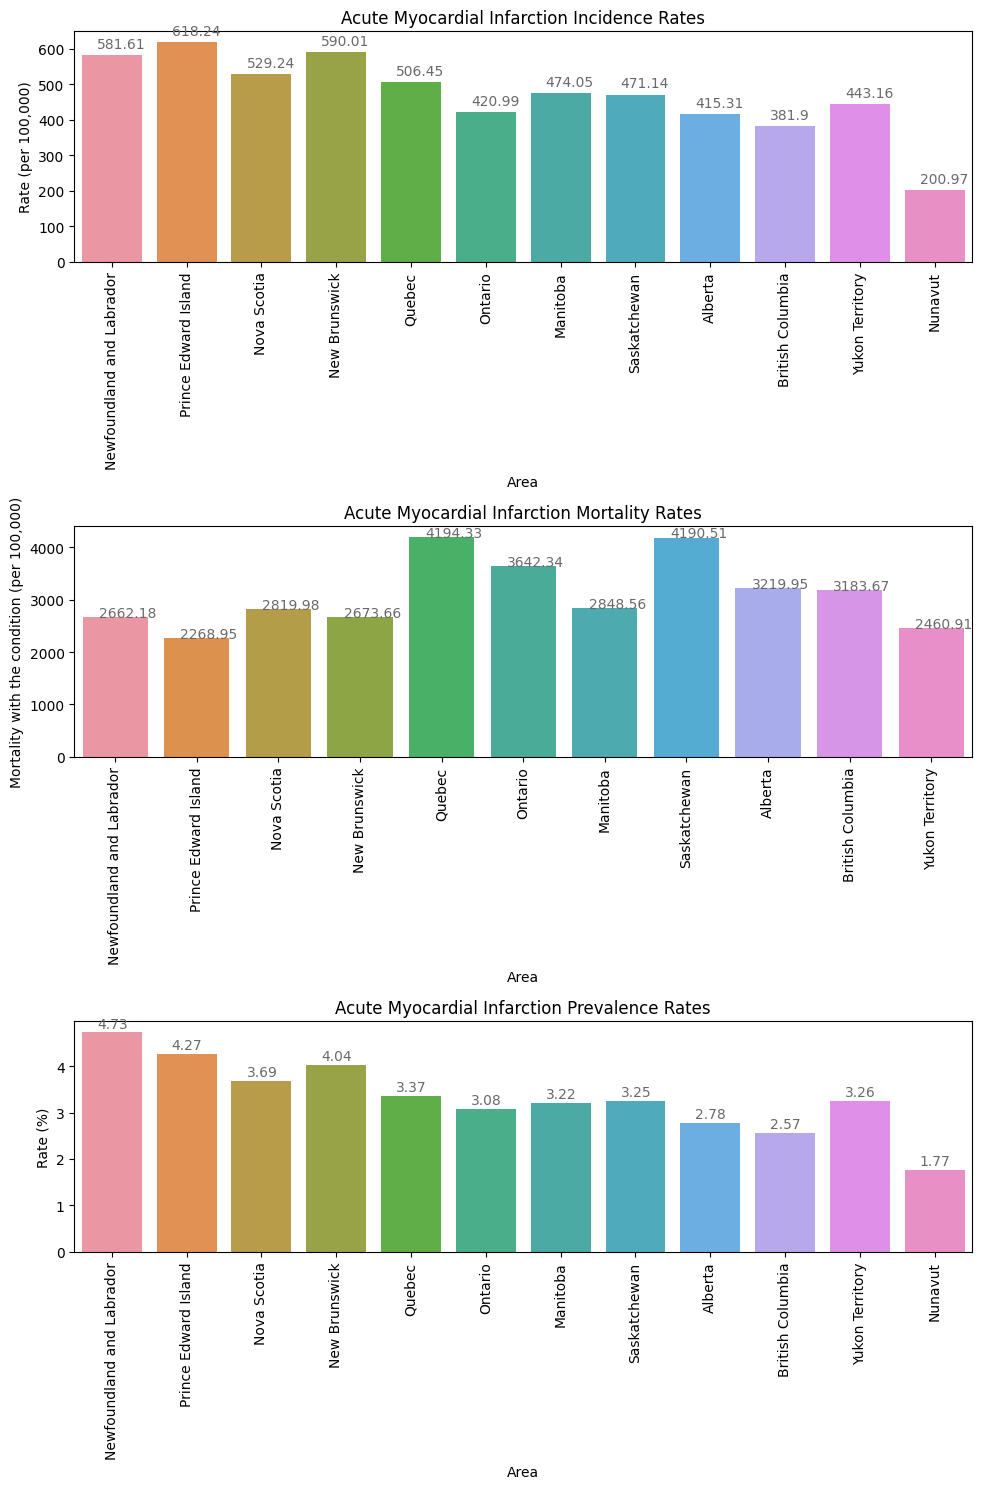

In [ ]:
# Analysis Provincially for Acute Myocardial Infarction(AMI):

# create subplots

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

sns.barplot(x="Area", y="Rate (per 100,000)", data=provincialidf_AMI, errorbar=None, ax=axes[0])
axes[0].set_title("Acute Myocardial Infarction Incidence Rates")

# set x-axis label rotation to 90 degrees

axes[0].set_xticklabels(labels=axes[0].get_xticklabels(), rotation=90)

# add text labels to incidence rates
for i in axes[0].patches:
  axes[0].text(i.get_x()+0.2, i.get_height()+20, \
            str(round(i.get_height(), 2)), fontsize=10, color='dimgrey')

# plot mortality rates

sns.barplot(x="Area", y="Mortality with the condition (per 100,000)", data=provincialmdf_AMI, errorbar=None, ax=axes[1])
axes[1].set_title("Acute Myocardial Infarction Mortality Rates")

# set x-axis label rotation to 90 degrees

axes[1].set_xticklabels(labels=axes[1].get_xticklabels(), rotation=90)

# add text labels to mortality rates
for i in axes[1].patches:
  axes[1].text(i.get_x()+0.2, i.get_height()+1, \
            str(round(i.get_height(), 2)), fontsize=10, color='dimgrey')
    
# plot prevalence rates

sns.barplot(x="Area", y="Rate (%)", data=provincialpdf_AMI, errorbar=None, ax=axes[2])
axes[2].set_title("Acute Myocardial Infarction Prevalence Rates")

# add text labels to prevalence rates
for i in axes[2].patches:
  axes[2].text(i.get_x()+0.2, i.get_height()+0.1, \
            str(round(i.get_height(), 2)), fontsize=10, color='dimgrey')

# set x-axis label rotation to 90 degrees

axes[2].set_xticklabels(labels=axes[2].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()





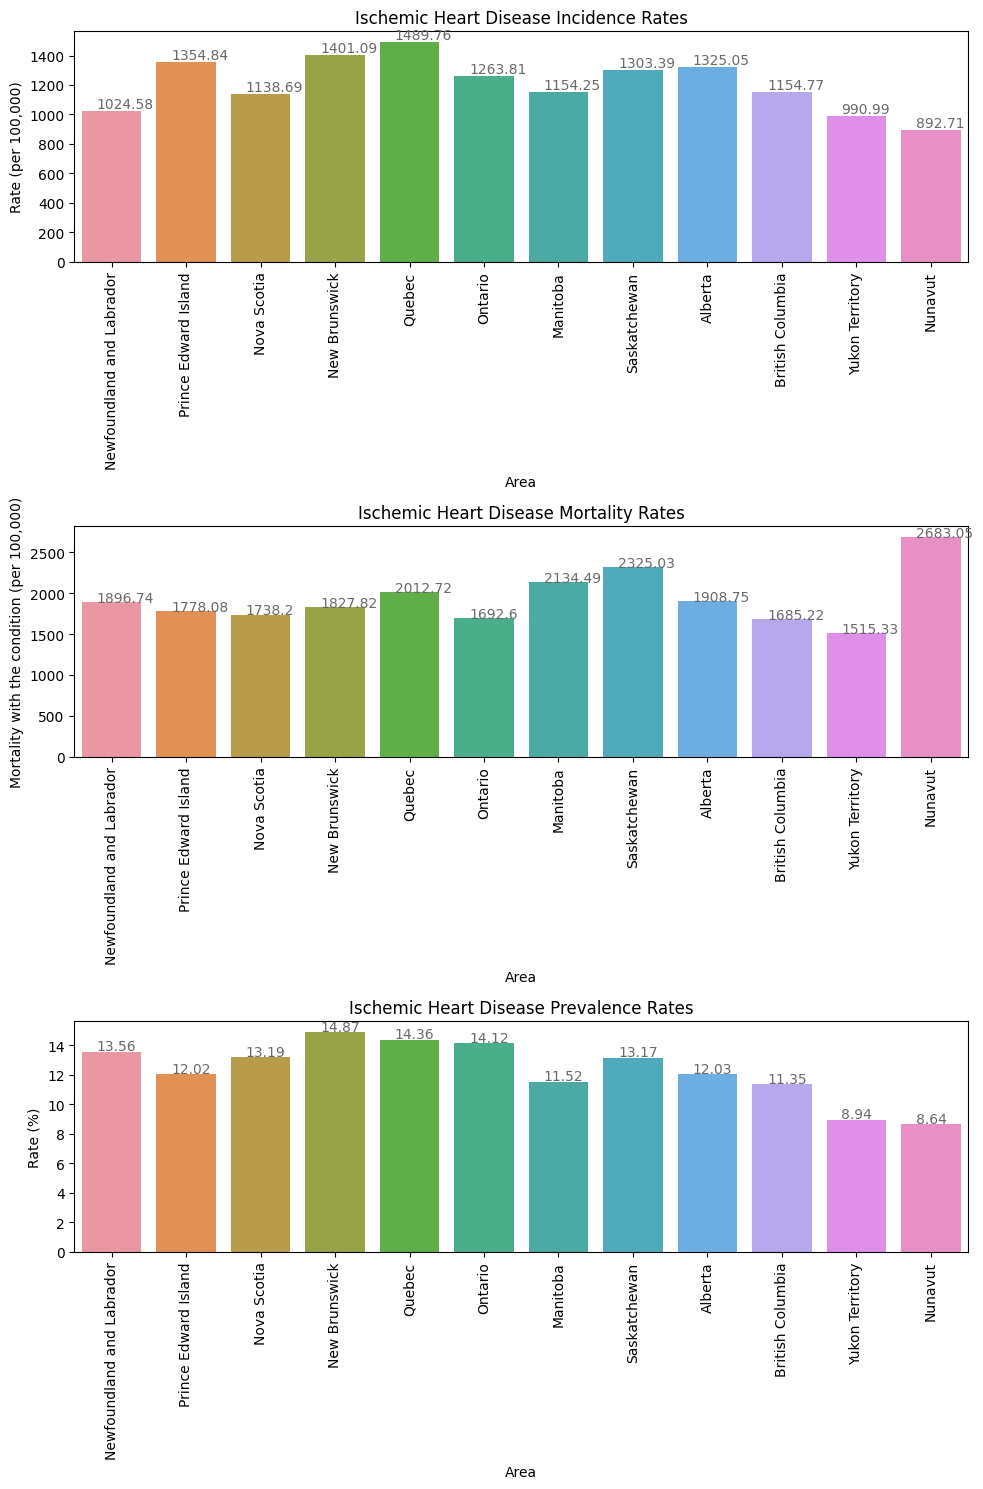

In [ ]:
# Analysis Provincially for Ischemic Heart Disease(IHD):

# create subplots

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

sns.barplot(x="Area", y="Rate (per 100,000)", data=provincialidf_IHD, errorbar=None, ax=axes[0])
axes[0].set_title("Ischemic Heart Disease Incidence Rates")

# set x-axis label rotation to 90 degrees

axes[0].set_xticklabels(labels=axes[0].get_xticklabels(), rotation=90)

# add text labels to incidence rates
for i in axes[0].patches:
  axes[0].text(i.get_x()+0.2, i.get_height()+20, \
            str(round(i.get_height(), 2)), fontsize=10, color='dimgrey')

# plot mortality rates

sns.barplot(x="Area", y="Mortality with the condition (per 100,000)", data=provincialmdf_IHD, errorbar=None, ax=axes[1])
axes[1].set_title("Ischemic Heart Disease Mortality Rates")

# set x-axis label rotation to 90 degrees

axes[1].set_xticklabels(labels=axes[1].get_xticklabels(), rotation=90)

# add text labels to mortality rates
for i in axes[1].patches:
  axes[1].text(i.get_x()+0.2, i.get_height()+1, \
            str(round(i.get_height(), 2)), fontsize=10, color='dimgrey')
    
# plot prevalence rates

sns.barplot(x="Area", y="Rate (%)", data=provincialpdf_IHD, errorbar=None, ax=axes[2])
axes[2].set_title("Ischemic Heart Disease Prevalence Rates")

# add text labels to prevalence rates
for i in axes[2].patches:
  axes[2].text(i.get_x()+0.2, i.get_height()+0.1, \
            str(round(i.get_height(), 2)), fontsize=10, color='dimgrey')

# set x-axis label rotation to 90 degrees

axes[2].set_xticklabels(labels=axes[2].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

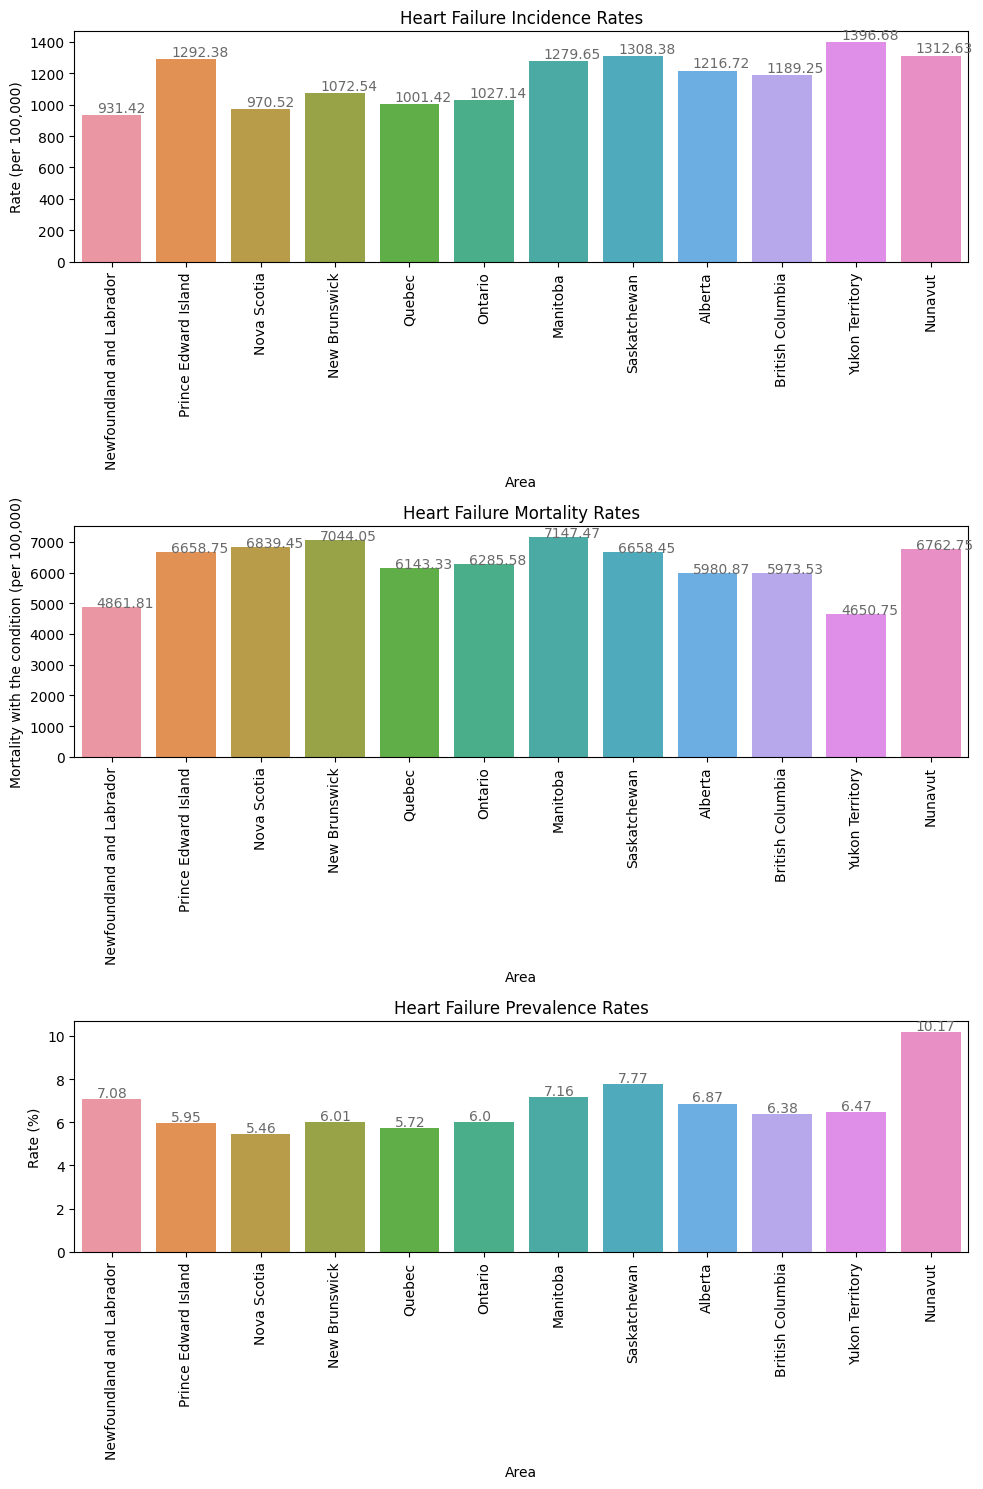

In [ ]:
# Analysis Provincially for Heart Failure(HF):

# create subplots

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

sns.barplot(x="Area", y="Rate (per 100,000)", data=provincialidf_HF, errorbar=None, ax=axes[0])
axes[0].set_title("Heart Failure Incidence Rates")

# set x-axis label rotation to 90 degrees

axes[0].set_xticklabels(labels=axes[0].get_xticklabels(), rotation=90)

# add text labels to incidence rates
for i in axes[0].patches:
  axes[0].text(i.get_x()+0.2, i.get_height()+20, \
            str(round(i.get_height(), 2)), fontsize=10, color='dimgrey')

# plot mortality rates

sns.barplot(x="Area", y="Mortality with the condition (per 100,000)", data=provincialmdf_HF, errorbar=None, ax=axes[1])
axes[1].set_title("Heart Failure Mortality Rates")

# set x-axis label rotation to 90 degrees

axes[1].set_xticklabels(labels=axes[1].get_xticklabels(), rotation=90)

# add text labels to mortality rates
for i in axes[1].patches:
  axes[1].text(i.get_x()+0.2, i.get_height()+1, \
            str(round(i.get_height(), 2)), fontsize=10, color='dimgrey')
    
# plot prevalence rates

sns.barplot(x="Area", y="Rate (%)", data=provincialpdf_HF, errorbar=None, ax=axes[2])
axes[2].set_title("Heart Failure Prevalence Rates")

# add text labels to prevalence rates
for i in axes[2].patches:
  axes[2].text(i.get_x()+0.2, i.get_height()+0.1, \
            str(round(i.get_height(), 2)), fontsize=10, color='dimgrey')

# set x-axis label rotation to 90 degrees

axes[2].set_xticklabels(labels=axes[2].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

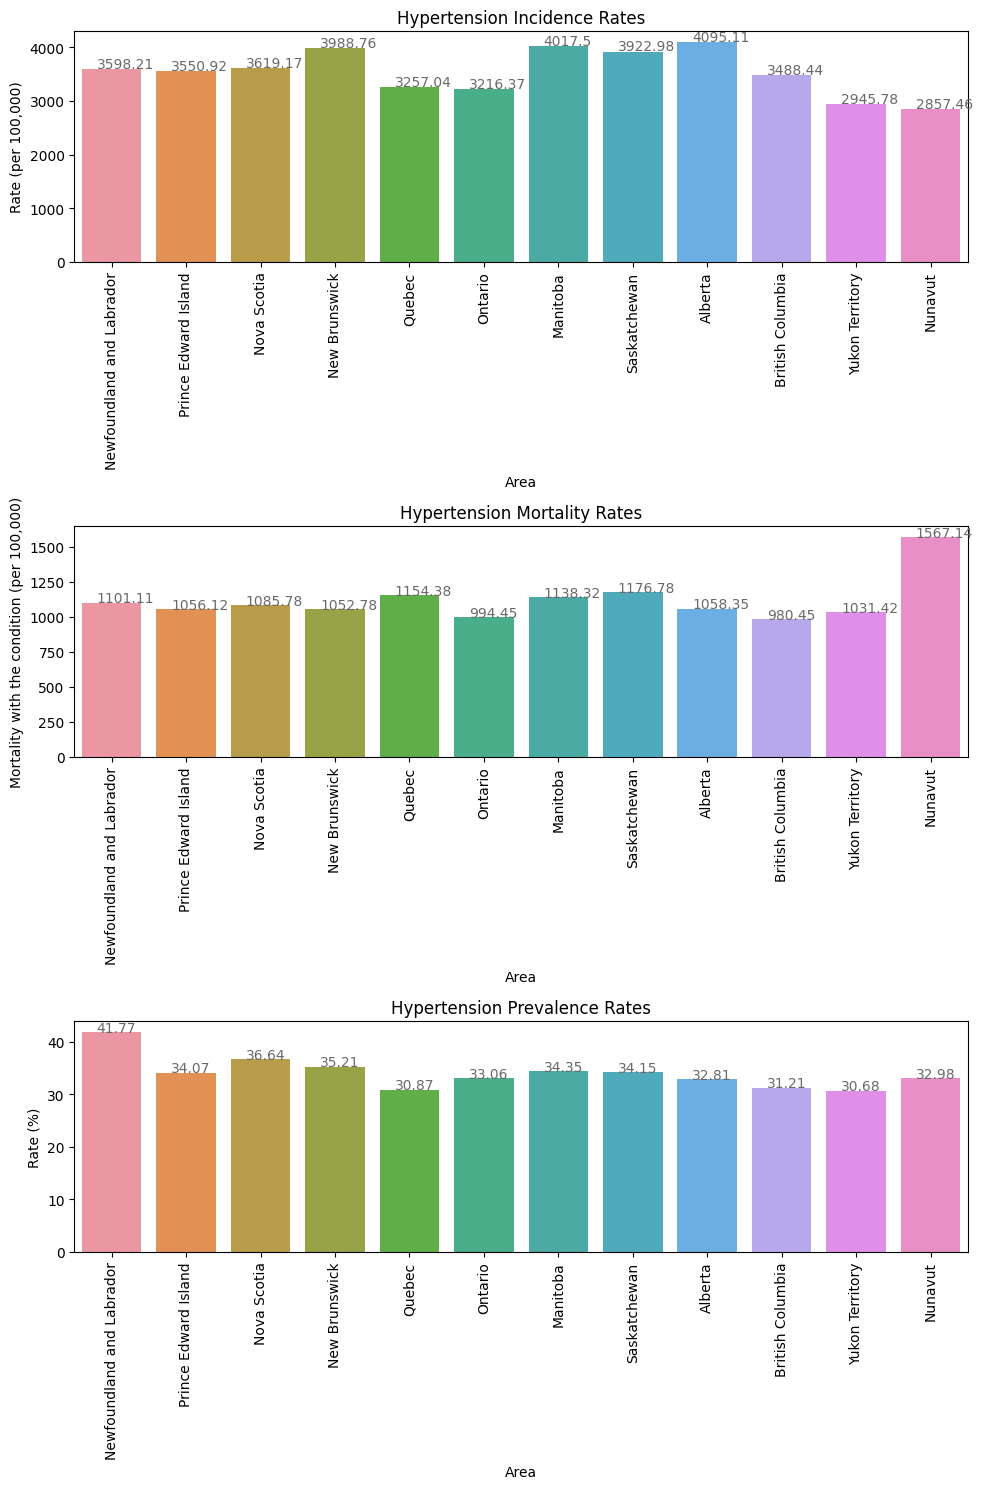

In [ ]:
# Analysis Provincially for Hypertension(HT):
# create subplots

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

sns.barplot(x="Area", y="Rate (per 100,000)", data=provincialidf_HT, errorbar=None, ax=axes[0])
axes[0].set_title("Hypertension Incidence Rates")

# set x-axis label rotation to 90 degrees

axes[0].set_xticklabels(labels=axes[0].get_xticklabels(), rotation=90)

# add text labels to incidence rates
for i in axes[0].patches:
  axes[0].text(i.get_x()+0.2, i.get_height()+20, \
            str(round(i.get_height(), 2)), fontsize=10, color='dimgrey')

# plot mortality rates

sns.barplot(x="Area", y="Mortality with the condition (per 100,000)", data=provincialmdf_HT, errorbar=None, ax=axes[1])
axes[1].set_title("Hypertension Mortality Rates")

# set x-axis label rotation to 90 degrees

axes[1].set_xticklabels(labels=axes[1].get_xticklabels(), rotation=90)

# add text labels to mortality rates
for i in axes[1].patches:
  axes[1].text(i.get_x()+0.2, i.get_height()+1, \
            str(round(i.get_height(), 2)), fontsize=10, color='dimgrey')
    
# plot prevalence rates

sns.barplot(x="Area", y="Rate (%)", data=provincialpdf_HT, errorbar=None, ax=axes[2])
axes[2].set_title("Hypertension Prevalence Rates")

# add text labels to prevalence rates
for i in axes[2].patches:
  axes[2].text(i.get_x()+0.2, i.get_height()+0.1, \
            str(round(i.get_height(), 2)), fontsize=10, color='dimgrey')

# set x-axis label rotation to 90 degrees

axes[2].set_xticklabels(labels=axes[2].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

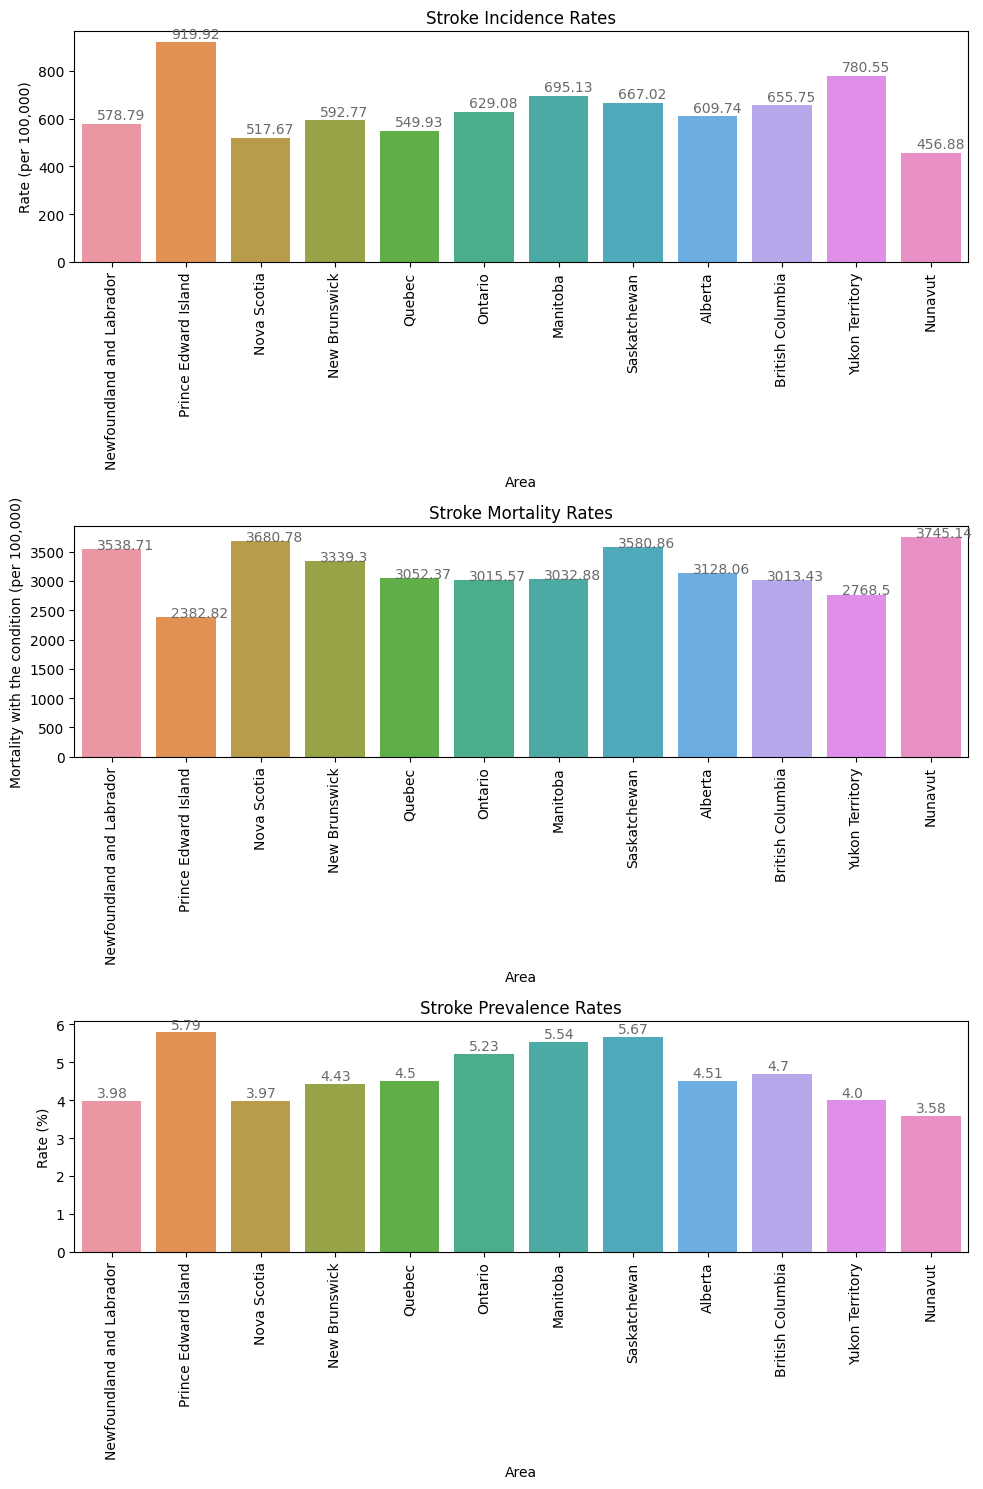

In [ ]:
# Analysis Provincially for Stroke(S):

# create subplots

fig, axes = plt.subplots(3, 1, figsize=(10, 15))
sns.barplot(x="Area", y="Rate (per 100,000)", data=provincialidf_S, errorbar=None, ax=axes[0])
axes[0].set_title("Stroke Incidence Rates")

# set x-axis label rotation to 90 degrees

axes[0].set_xticklabels(labels=axes[0].get_xticklabels(), rotation=90)

# add text labels to incidence rates
for i in axes[0].patches:
  axes[0].text(i.get_x()+0.2, i.get_height()+20, \
            str(round(i.get_height(), 2)), fontsize=10, color='dimgrey')

# plot mortality rates

sns.barplot(x="Area", y=provincialmdf_S.columns.values[9], data=provincialmdf_S, errorbar=None, ax=axes[1])
axes[1].set_title("Stroke Mortality Rates")

# set x-axis label rotation to 90 degrees

axes[1].set_xticklabels(labels=axes[1].get_xticklabels(), rotation=90)

# add text labels to mortality rates
for i in axes[1].patches:
  axes[1].text(i.get_x()+0.2, i.get_height()+1, \
            str(round(i.get_height(), 2)), fontsize=10, color='dimgrey')
    
# plot prevalence rates

sns.barplot(x="Area", y="Rate (%)", data=provincialpdf_S, errorbar=None, ax=axes[2])
axes[2].set_title("Stroke Prevalence Rates")

# add text labels to prevalence rates
for i in axes[2].patches:
  axes[2].text(i.get_x()+0.2, i.get_height()+0.1, \
            str(round(i.get_height(), 2)), fontsize=10, color='dimgrey')

# set x-axis label rotation to 90 degrees

axes[2].set_xticklabels(labels=axes[2].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()


## Now let's start analysing our data to get a better undersatnding to answer our second analysis question.

`What are the temporal trends in incidence, mortality and prevalance rates of specific cardiovascular diseases over time?`

### Incidence Trend over time for all 5 conditions

*There was a bit of Transformation necessary before this Incidence trend can be plotted*

The column name 'Rate (per 100,000)' contains a non-standard character. The space between 'per' and '100,000' appears to be a non-breaking space (Unicode character codepoint U+00A0), which can cause issues with certain functions and methods that expect a regular space character.

It was throwing an error even though it was an exact match. 

Checked by printing the column names.

Then proceeded to check by printing out the column names using a for loop to see if there are any unexpected characters.

Then had to replace this non-breaking space with a regular space using the str.replace() method.

In [ ]:
print(provincialidf_HF.columns)


Index(['Area', 'Sex', 'Age Group', 'Year', 'Rate (per 100,000)',
       'Rate_95%_CI_Lower', 'Rate_95%_CI_Upper', 'Rate CV', 'Counts',
       'Population'],
      dtype='object')


In [ ]:
for col in provincialidf_HF.columns:
    print(repr(col))


'Area'
'Sex'
'Age Group'
'Year'
'Rate (per\xa0100,000)'
'Rate_95%_CI_Lower'
'Rate_95%_CI_Upper'
'Rate CV'
'Counts'
'Population'


In [ ]:
for col in provincialidf_HT.columns:
    print(repr(col))

'Area'
'Sex'
'Age Group'
'Year'
'Rate (per\xa0100,000)'
'Rate_95%_CI_Lower'
'Rate_95%_CI_Upper'
'Rate CV'
'Counts'
'Population'


In [ ]:
provincialidf_AMI.columns = provincialidf_AMI.columns.str.replace('\xa0', ' ')
provincialidf_HF.columns = provincialidf_HF.columns.str.replace('\xa0', ' ')
provincialidf_HT.columns = provincialidf_HF.columns.str.replace('\xa0', ' ')
provincialidf_S.columns = provincialidf_HF.columns.str.replace('\xa0', ' ')
provincialidf_IHD.columns = provincialidf_HF.columns.str.replace('\xa0', ' ')



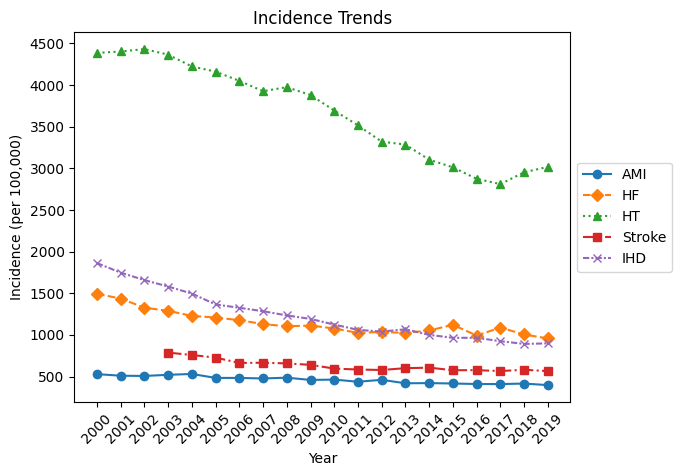

In [ ]:
# Pivot the dataframes
provincialidf_AMI_pivot = pd.pivot_table(provincialidf_AMI, values=['Rate (per 100,000)'], index=['Year'], columns=['Sex'], aggfunc='mean')
provincialidf_HF_pivot = pd.pivot_table(provincialidf_HF, values=['Rate (per 100,000)'], index=['Year'], columns=['Sex'], aggfunc='mean')
provincialidf_HT_pivot = pd.pivot_table(provincialidf_HT, values=['Rate (per 100,000)'], index=['Year'], columns=['Sex'], aggfunc='mean')
provincialidf_S_pivot = pd.pivot_table(provincialidf_S, values=['Rate (per 100,000)'], index=['Year'], columns=['Sex'], aggfunc='mean')
provincialidf_IHD_pivot = pd.pivot_table(provincialidf_IHD, values=['Rate (per 100,000)'], index=['Year'], columns=['Sex'], aggfunc='mean')

# Define line styles for each condition
line_styles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1)), (0, (1, 1))]

# Plot the incidence trend for AMI
plt.plot(provincialidf_AMI_pivot.index.astype(str), provincialidf_AMI_pivot[('Rate (per 100,000)', 'Both sexes')], label='AMI', marker='o', linestyle=line_styles[0])

# Plot the incidence trend for HF
plt.plot(provincialidf_HF_pivot.index.astype(str), provincialidf_HF_pivot[('Rate (per 100,000)', 'Both sexes')], label='HF', marker='D', linestyle=line_styles[1])

# Plot the incidence trend for HT
plt.plot(provincialidf_HT_pivot.index.astype(str), provincialidf_HT_pivot[('Rate (per 100,000)', 'Both sexes')], label='HT', marker='^', linestyle=line_styles[2])

# Plot the incidence trend for Stroke
plt.plot(provincialidf_S_pivot.index.astype(str), provincialidf_S_pivot[('Rate (per 100,000)', 'Both sexes')], label='Stroke', marker='s', linestyle=line_styles[3])

# Plot the incidence trend for IHD
plt.plot(provincialidf_IHD_pivot.index.astype(str), provincialidf_IHD_pivot[('Rate (per 100,000)', 'Both sexes')], label='IHD', marker='x', linestyle=line_styles[4])


# Set the title, x-axis label, and y-axis label
plt.title('Incidence Trends')
plt.xlabel('Year')
plt.ylabel('Incidence (per 100,000)')
plt.xticks(rotation=45)

# Add the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Show the plot
plt.show()


### Mortality Trend over time for all 5 conditions

Just as with the Incidence, the Mortality datasets also happen to have a non-standard character in column name being called.

In [ ]:
for col in provincialmdf_HT.columns:
    print(repr(col))

'Area'
'Sex'
'Age Group'
'Year'
'Mortality without the condition (per\xa0100,000)'
'Lower_95%_CI of Mortality without the condition'
'Upper_95%_CI of Mortality without the condition'
'Number of Mortality without the condition'
'Population of Mortality without the condition'
'Mortality with the condition (per\xa0100,000)'
'Lower_95%_CI of Mortality with the condition'
'Upper_95%_CI of Mortality with the condition'
'Number of Mortality with the condition'
'Population of Mortality with the condition'
'Rate Ratio'
'Lower_95%_CI of Rate Ratio'
'Upper_95%_CI of Rate Ratio'


Replacing non-breaking space with a regular space using the str.replace() method.

In [ ]:
provincialmdf_AMI.columns = provincialmdf_AMI.columns.str.replace('\xa0', ' ')
provincialmdf_HF.columns = provincialmdf_HF.columns.str.replace('\xa0', ' ')
provincialmdf_HT.columns = provincialmdf_HF.columns.str.replace('\xa0', ' ')
provincialmdf_S.columns = provincialmdf_HF.columns.str.replace('\xa0', ' ')
provincialmdf_IHD.columns = provincialmdf_HF.columns.str.replace('\xa0', ' ')

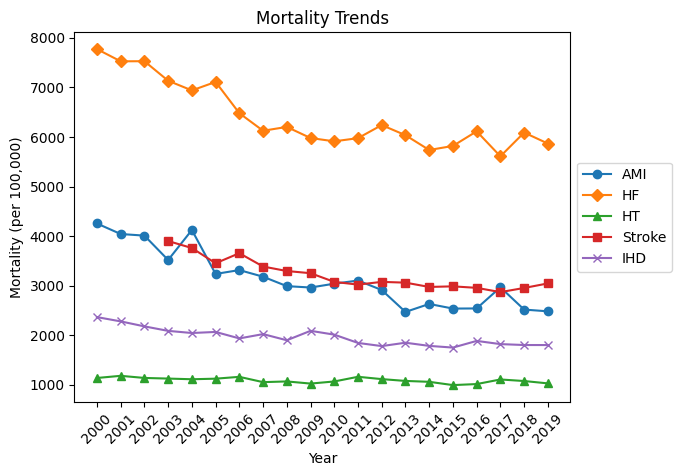

In [ ]:
# Pivot the dataframes
provincialmdf_AMI_pivot = pd.pivot_table(provincialmdf_AMI, values=['Mortality with the condition (per 100,000)'], index=['Year'], columns=['Sex'], aggfunc='mean')
provincialmdf_HF_pivot = pd.pivot_table(provincialmdf_HF, values=['Mortality with the condition (per 100,000)'], index=['Year'], columns=['Sex'], aggfunc='mean')
provincialmdf_HT_pivot = pd.pivot_table(provincialmdf_HT, values=['Mortality with the condition (per 100,000)'], index=['Year'], columns=['Sex'], aggfunc='mean')
provincialmdf_S_pivot = pd.pivot_table(provincialmdf_S, values=['Mortality with the condition (per 100,000)'], index=['Year'], columns=['Sex'], aggfunc='mean')
provincialmdf_IHD_pivot = pd.pivot_table(provincialmdf_IHD, values=['Mortality with the condition (per 100,000)'], index=['Year'], columns=['Sex'], aggfunc='mean')

# Plot the mortality trend for AMI
plt.plot(provincialmdf_AMI_pivot.index.astype(str), provincialmdf_AMI_pivot[('Mortality with the condition (per 100,000)', 'Both sexes')], label='AMI', marker='o')

# Plot the mortality trend for HF
plt.plot(provincialmdf_HF_pivot.index.astype(str), provincialmdf_HF_pivot[('Mortality with the condition (per 100,000)', 'Both sexes')], label='HF', marker='D')

# Plot the mortality trend for HT
plt.plot(provincialmdf_HT_pivot.index.astype(str), provincialmdf_HT_pivot[('Mortality with the condition (per 100,000)', 'Both sexes')], label='HT', marker='^')

# Plot the mortality trend for Stroke
plt.plot(provincialmdf_S_pivot.index.astype(str), provincialmdf_S_pivot[('Mortality with the condition (per 100,000)', 'Both sexes')], label='Stroke', marker='s')

# Plot the mortality trend for IHD
plt.plot(provincialmdf_IHD_pivot.index.astype(str), provincialmdf_IHD_pivot[('Mortality with the condition (per 100,000)', 'Both sexes')], label='IHD', marker='x')

# Set the title, x-axis label, and y-axis label
plt.title('Mortality Trends')
plt.xlabel('Year')
plt.ylabel('Mortality (per 100,000)')
plt.xticks(rotation=45)

# Add the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Show the plot
plt.show()


## Now let's delve into our third analysis question.

What is the relative contribution of specific cardiovascular diseases to the total incidence,mortality,or prevalance of all cardiovascular diseases in each provice?

In [ ]:

# group by Area and sum up the values for each disease
prevalence_data = pd.concat([provincialpdf_S,provincialpdf_AMI, provincialpdf_HF ,provincialpdf_IHD, provincialpdf_HT])
total_prevalence = prevalence_data.groupby("Area")["Rate (%)"].sum()



In [ ]:
total_prevalence

Area
Alberta                      20585.01
British Columbia             19596.11
Manitoba                     21460.18
New Brunswick                22569.10
Newfoundland and Labrador    15052.40
Nova Scotia                  22115.41
Nunavut                      13385.19
Ontario                      21495.60
Prince Edward Island         21401.42
Quebec                       20587.75
Saskatchewan                 22252.21
Yukon Territory               8893.09
Name: Rate (%), dtype: float64

In [ ]:
# Calculate total_incidence

incidence_data = pd.concat([provincialidf_S,provincialidf_AMI, provincialidf_HF ,provincialidf_IHD, provincialidf_HT])

In [ ]:
total_incidence = incidence_data.groupby("Area")[incidence_data.columns.values[4]].sum()


In [ ]:
total_incidence

Area
Alberta                      2647379.0
British Columbia             2358838.0
Manitoba                     2605043.0
New Brunswick                2619279.0
Newfoundland and Labrador    1384412.0
Nova Scotia                  2338594.0
Nunavut                       863086.0
Ontario                      2265063.0
Prince Edward Island         2427968.0
Quebec                       2359364.0
Saskatchewan                 2626054.0
Yukon Territory               856342.0
Name: Rate (per 100,000), dtype: float64

In [ ]:
# Calculate total_mortality
mortality_data = pd.concat([provincialmdf_S,provincialmdf_AMI, provincialmdf_HF ,provincialmdf_IHD, provincialmdf_HT])

total_mortality = mortality_data.groupby("Area")[mortality_data.columns[9]].sum()


In [ ]:
total_mortality

Area
Alberta                       879946.0
British Columbia              847139.0
Manitoba                      935858.0
New Brunswick                 882770.0
Newfoundland and Labrador     489219.0
Nova Scotia                   930224.0
Nunavut                       291429.0
Ontario                       896123.0
Prince Edward Island          761718.0
Quebec                        965957.0
Saskatchewan                 1022718.0
Yukon Territory               205337.0
Name: Mortality with the condition (per 100,000), dtype: float64

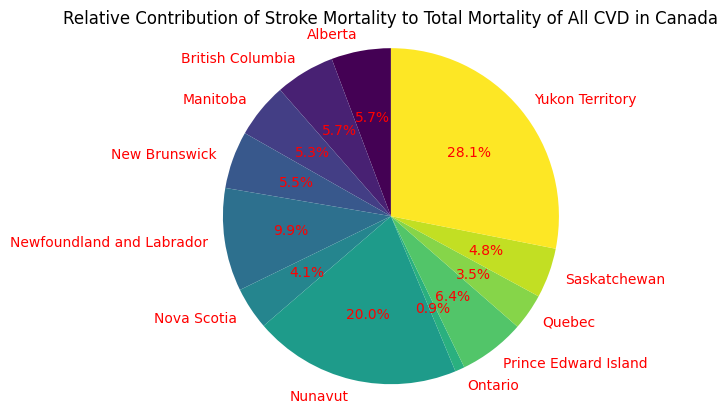

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Defining the data
provinces = total_mortality.index.tolist()
cvd_deaths = total_mortality.values.tolist()
stroke_mortality = Stroke_Mortality.tolist()

# Calculate the percentages
percentages = [(s / c) * 100 for s, c in zip(stroke_mortality, cvd_deaths)]

# Set the colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(provinces)))

# Set the text color to red
text_props = {'color': 'red'}

# Plot the pie chart
plt.pie(percentages, labels=provinces, autopct='%1.1f%%', startangle=90, colors=colors, textprops=text_props)
plt.axis('equal')
plt.title('Relative Contribution of Stroke Mortality to Total Mortality of All CVD in Canada')

plt.show()


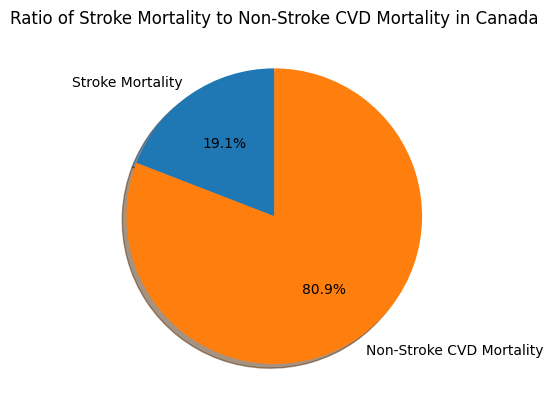

In [ ]:
#Calculate the total CVD deaths
cvd_deaths = total_mortality.sum().sum()
# Calculate the stroke mortality and non-stroke CVD mortality
stroke_mortality = Stroke_Mortality.sum().sum()
non_stroke_mortality = cvd_deaths - stroke_mortality
# Plot the pie chart
labels = ['Stroke Mortality', 'Non-Stroke CVD Mortality']
data = [stroke_mortality, non_stroke_mortality]
plt.pie(data, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('Ratio of Stroke Mortality to Non-Stroke CVD Mortality in Canada')
plt.show()



## Now let's look at our fourth analysis question.

What are the most notable geographic patterns or hotspots of cardiovascular disease burden, and how do they differ across regions?

In [ ]:
idf_S = pd.read_csv(project_directory+'stroke.csv', encoding='unicode_escape').dropna()

provincialidf_S = idf_S.loc[idf_S['Area'] != 'Canada']

In [ ]:
# Filter the "incident_rate", "area", and "year" columns from df_incidence
df_filtered = provincialidf_S.loc[:, ['Rate (per 100,000)', 'Area', 'Year']]

# Remove the duplicates based on the "year" column
df_filtered = df_filtered.drop_duplicates(subset=['Area','Year'])

# Print the new dataframe
df_filtered.head()

,"Rate (per 100,000)",Area,Year
1101,295.0,Newfoundland and Labrador,2008
1107,280.0,Newfoundland and Labrador,2009
1113,278.0,Newfoundland and Labrador,2010
1119,288.0,Newfoundland and Labrador,2011
1125,283.0,Newfoundland and Labrador,2012


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 88.1 MB/s eta 0:00:00


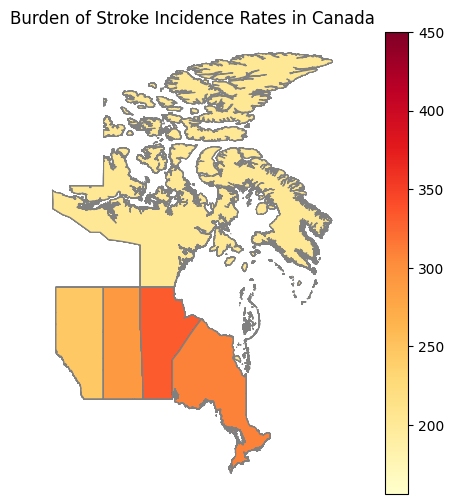

In [ ]:
!pip install geopandas
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the shapefile
canada_regions = gpd.read_file('/content/drive/MyDrive/Colab_Notebooks/Project103/gpr_000b11a_e/gpr_000b11a_e.shp')


# Merge the shapefile and the incidence data based on the province or territory name
merged_dt = canada_regions.merge(df_filtered, left_on="PRNAME", right_on="Area")

# Plot the merged data as a choropleth map of stroke incidence rates
fig, ax = plt.subplots(figsize=(10, 6))
merged_dt.plot(column="Rate (per 100,000)", cmap="YlOrRd", linewidth=0.8, edgecolor="gray", ax=ax, legend=True)
ax.set_title("Burden of Stroke Incidence Rates in Canada")
ax.axis("off")
plt.show()